In [137]:
import pandas as pd 
from pandas import Series,DataFrame

In [138]:
titanic_df = pd.read_csv('C:\\Users\\kmobolade\\Documents\\titanic.csv')

In [139]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [140]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


TypeError: unsupported operand type(s) for /: 'str' and 'long'

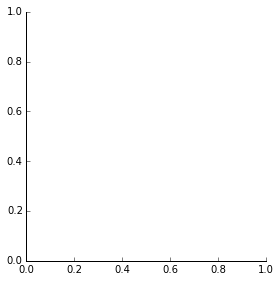

In [143]:
sns.factorplot('Cabin',data=titanic_df)

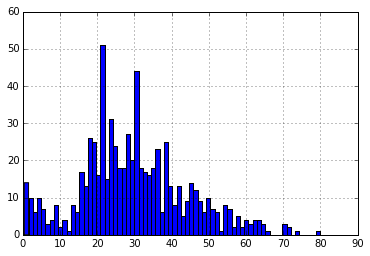

In [144]:
titanic_df['Age'].hist(bins=70)

In [147]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [150]:
titanic_df['Age'].mean()

29.69911764705882

AttributeError: 'DataFrame' object has no attribute 'age'

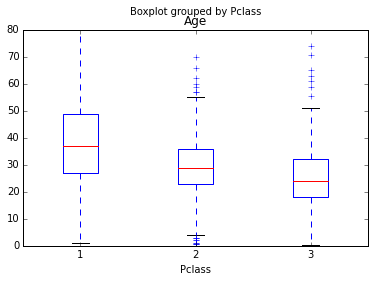

In [154]:
p = titanic_df.boxplot(column='Age', by='Pclass', grid=False)
for i in [1,2,3]:
    y = titanic_df.age[titanic_df.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plot(x, y, 'r.', alpha=0.2)

In [ ]:
import seaborn as sns
sns.factorplot('Sex',date=titanic,hue='Pclass')

In [ ]:
stats = titanic.describe()
print (np.all(stats.ix['count']== titanic.shape[0]))

In [ ]:
stats.ix[:,'Survived':]

In [ ]:
titanic_numericals = titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']]
titanic_numericals.corr()

In [ ]:
corr_threshold = 0.2

columns_with_corr = np.where(abs(titanic_numericals.corr())> corr_threshold) #store corr above threshold
collinearity_index = np.where(columns_with_corr[0] != columns_with_corr[1]) #false to diagnals

x_cols = columns_with_corr[0][collinearity_index]
y_cols = columns_with_corr[1][collinearity_index]

In [ ]:
if x_cols.any() and y_cols.any():
    print ('There is a collinearity between :')
    print (x_cols,y_cols)#do not repeat same combinations
else:
    print ('No collinearity between vars above %2f' %corr_threshold)

In [ ]:
titanic.drop('PassengerID',axis=1).hist(figsize=(16,12),bins = 50)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(18,12))

ax1=plt.subplot(221)
ax1.boxplot([titanic.Age[titanic.Survived ==0],titanic.Age[titanic.Survived==1]],vert = 0)
ax1.set_xlim(titanic.age.min(),titanic.Age.max())
ax1.set_yticklabels(('No','Yes'))
ax1.set_ylabel('Survived')
ax1.set_xlabel('Age')

ax2 = plt.subplot(222)
ax2.boxplot([titanic.Fare[titanic.Survived==0],titanic.Fare[titanic.Survived==1]])
ax2.set_ylim(titanic.Fare.min(),titanic.Fare.max()
ax2.set_xticklabels(('No','Yes'))
ax2.set_xlabel('Survived')
ax2.set_ylabel('Fare')

ax3 = plt.subplot(223)
cm_bright = ListedColormap(['#0000FF','#FF0000'])
ax3.scatter(titanic.Fare,titanic.Age, c=titanic.Survived,cmap=cm_bright)
ax3.set_xlabel('Fare')
ax3.set_ylabel('Age')

ax3=plt.subplot(224)
ax3.scatter = (titanic.Fare,titanic.Pclass,c=titanic.Survived,cmap=cm_bright)
ax3.set_xlim(-50,600)
ax3.set_xlabel('Fare')
ax3.set_ylabel('Passenger Class')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

pd.crosstab([titanic.Sex, titanic.Pclass],[titanic.Survived]).plot(kind='barh')


In [ ]:
pd.crosstab([titanic.Embarked.replace(['S','C','Q'],['Southhampton','Cherbourg','Queenstown']),
             titanic.Pclass.replace([1,2,3],['High','Mid','Low'])],
            [titanic.Survived]).plot(kind ='barh')

In [ ]:
titanic.info()